In [2]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np

# KMeans Modeling

In [3]:
#Load data
data = pd.read_csv("Resources/NPX_data1_merged.csv")
data.head()


,SampleID,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,...,FABP9-OID01115,TMPRSS15-OID01116,LHB-OID01117,FOSB-OID01118,CALR-OID01119,PGF-OID01493,Subject,Treatment,Site,Time
0,A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,...,5.698748,1.640175,1.187713,3.843168,1.278116,2.457126,ID1,Untreated,Site_D,Baseline
1,A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,...,5.751120,1.433037,2.068403,2.972200,4.908331,3.756646,ID1,Untreated,Site_D,Week.6
2,A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,...,9.776941,2.514728,0.530500,0.803449,5.720805,2.195161,ID1,Untreated,Site_D,Week.12
3,A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,...,8.191348,4.953789,1.588413,1.929322,6.883288,2.552394,ID2,Untreated,Site_C,Baseline
4,A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,...,5.697130,1.292394,1.370663,2.180779,13.823078,1.381204,ID2,Untreated,Site_C,Week.6


In [4]:
#Slice data down to first 100 proteins 
data_sub1 = data.iloc[:,np.r_[0:101,1105:1109]]

data_sub1.head()


,SampleID,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,...,ADM-OID00381,CD40-L-OID00382,SLAMF7-OID00383,PGF-OID00384,ADAM-TS13-OID00385,BOC-OID00386,Subject,Treatment,Site,Time
0,A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,...,2.198139,1.291522,4.529603,5.183238,12.039588,1.925143,ID1,Untreated,Site_D,Baseline
1,A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,...,2.717734,3.343225,3.467782,9.184422,14.072240,1.692263,ID1,Untreated,Site_D,Week.6
2,A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,...,2.525645,3.929840,3.128048,3.227016,11.912785,3.019094,ID1,Untreated,Site_D,Week.12
3,A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,...,2.101863,7.779821,0.887734,-0.416997,13.116702,7.190854,ID2,Untreated,Site_C,Baseline
4,A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,...,1.627676,6.295789,5.046515,3.984089,10.436168,2.011575,ID2,Untreated,Site_C,Week.6


In [5]:
#Filter data by baseline and treated data
data_sub1_baseline = data_sub1.loc[data_sub1["Time"]=="Baseline"]
data_sub1_baseline_treated = data_sub1_baseline.loc[data_sub1_baseline["Treatment"]=="Treated"]

data_sub1_baseline_treated.head()


,SampleID,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,...,ADM-OID00381,CD40-L-OID00382,SLAMF7-OID00383,PGF-OID00384,ADAM-TS13-OID00385,BOC-OID00386,Subject,Treatment,Site,Time
15,A16,11.431302,10.207661,3.311984,10.313994,3.526815,13.334769,10.661415,3.454648,4.788196,...,2.403252,6.054128,6.026412,5.794836,13.233841,6.611926,ID6,Treated,Site_D,Baseline
21,A22,14.413956,4.499181,2.157865,11.475391,5.275544,8.329090,9.415025,4.355936,1.821448,...,1.788862,5.705194,5.664318,3.202821,9.450591,2.944122,ID8,Treated,Site_D,Baseline
27,A28,14.298536,9.245159,3.876550,17.613731,1.442955,19.111726,8.377921,6.110698,-0.142707,...,0.617727,4.393221,7.281598,7.139218,10.923844,3.359619,ID10,Treated,Site_E,Baseline
30,A31,8.997277,6.213137,4.177450,12.263095,2.457417,14.995332,16.445440,3.376299,3.574273,...,0.156779,2.405690,3.069570,4.613158,10.580098,3.735951,ID11,Treated,Site_C,Baseline
42,A43,13.239903,2.737570,1.469364,3.395995,5.755748,4.580889,16.362145,0.720351,4.323355,...,1.407699,4.704192,2.730972,6.940682,11.586009,0.634908,ID15,Treated,Site_C,Baseline


In [6]:
#Filter data by week12 and treated
data_sub1_week12_treated = data_sub1.loc[data_sub1["Time"]=="Week.12"]
data_sub1_week12_treated = data_sub1_week12_treated.loc[data_sub1_week12_treated["Treatment"] == "Treated"]


In [7]:
#Create dataframe of only NPX values for each sample in the Baseline-Treated set
data_sub1_bl_t_numeric = data_sub1_baseline_treated.drop(["Subject","Treatment","Site","Time"],axis=1)

data_sub1_bl_t_numeric = data_sub1_bl_t_numeric.reset_index()
data_sub1_bl_t_numeric = data_sub1_bl_t_numeric.set_index("SampleID")
data_sub1_bl_t_numeric = data_sub1_bl_t_numeric.drop("index",axis=1)


In [8]:
data_sub1_bl_t_numeric.shape

(23, 100)

### 23 Samples of Treated Baseline NPX values

In [9]:
mean_data = data_sub1_bl_t_numeric.mean()
mean_data


CHL1-OID01216         10.555743
NRP1-OID01217          7.338030
PLXNB2-OID01218        2.812504
FCGR3B-OID01219       10.337315
LILRB5-OID01220        4.162704
                        ...    
CD40-L-OID00382        4.287116
SLAMF7-OID00383        4.478076
PGF-OID00384           6.314602
ADAM-TS13-OID00385     9.944362
BOC-OID00386           3.193928
Length: 100, dtype: float64

In [10]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, init="k-means++")

# Fit the model to the data
kmeans.fit(data_sub1_bl_t_numeric)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(data_sub1_bl_t_numeric)
print(predicted_clusters)
print(data_sub1_bl_t_numeric.shape)


[ 1  0 11  9  8 10 11  3  1  3  2  9  1  3  0  9  9  5  6  7 10  5  4]
(23, 100)


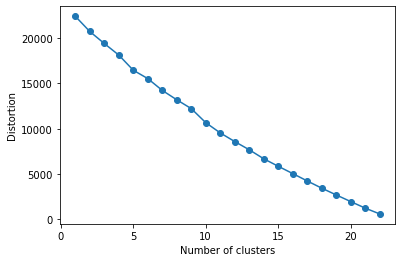

In [11]:


# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 23):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data_sub1_bl_t_numeric)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 23), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### There is an overabundance of distortion until the number of clusters equals the number of samples used (23).
### This model appears to not be a a good classifier of our data

## Create Boxplots of Baseline Treated data

In [12]:
data_plotting = data_sub1_baseline_treated.drop(["Subject","Treatment","Site","Time"], axis=1)
data_plotting = data_plotting.set_index("SampleID")
data_plotting


,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,CST3-OID01225,...,ANGPTL3-OID01306,LYVE1-OID01307,BMP-6-OID00379,ANG-1-OID00380,ADM-OID00381,CD40-L-OID00382,SLAMF7-OID00383,PGF-OID00384,ADAM-TS13-OID00385,BOC-OID00386
SampleID,,,,,,,,,,,,,,,,,,,,,
A16,11.431302,10.207661,3.311984,10.313994,3.526815,13.334769,10.661415,3.454648,4.788196,9.268302,...,16.219601,6.585470,2.583167,7.864351,2.403252,6.054128,6.026412,5.794836,13.233841,6.611926
A22,14.413956,4.499181,2.157865,11.475391,5.275544,8.329090,9.415025,4.355936,1.821448,3.862319,...,8.347996,6.331512,1.934204,10.836894,1.788862,5.705194,5.664318,3.202821,9.450591,2.944122
A28,14.298536,9.245159,3.876550,17.613731,1.442955,19.111726,8.377921,6.110698,-0.142707,4.788843,...,8.216388,2.749104,1.856208,7.109449,0.617727,4.393221,7.281598,7.139218,10.923844,3.359619
A31,8.997277,6.213137,4.177450,12.263095,2.457417,14.995332,16.445440,3.376299,3.574273,13.678336,...,1.405525,7.363934,0.802100,15.782508,0.156779,2.405690,3.069570,4.613158,10.580098,3.735951
A43,13.239903,2.737570,1.469364,3.395995,5.755748,4.580889,16.362145,0.720351,4.323355,12.124630,...,8.478774,11.663084,1.747530,3.484689,1.407699,4.704192,2.730972,6.940682,11.586009,0.634908
A52,10.706560,10.242907,3.979089,12.678149,8.148608,12.584953,6.870237,4.102986,2.844699,9.305607,...,8.790792,11.329231,2.402368,2.789667,2.107521,3.132297,7.026995,5.649481,8.770101,0.915921
A55,13.903061,6.634164,1.831752,17.212303,4.184785,14.601944,11.389343,7.201252,0.622057,18.381362,...,2.005156,4.586931,2.891111,13.690826,1.701088,5.821557,4.776657,5.974116,4.234998,5.820168
A67,13.682953,9.201907,2.864919,0.423135,0.792712,11.840858,11.711461,5.310094,3.555242,12.822397,...,14.754664,8.870500,4.121152,7.621258,1.809465,4.317222,4.883482,7.505217,7.498595,3.450983
B2,7.573612,2.522189,2.655571,15.020350,5.672701,14.499941,5.679460,3.803006,3.406612,7.059989,...,16.306137,11.512802,3.872090,8.676630,1.800899,3.517253,6.224177,6.183493,12.385130,3.863414


In [13]:
data_plotting.describe()


,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,CST3-OID01225,...,ANGPTL3-OID01306,LYVE1-OID01307,BMP-6-OID00379,ANG-1-OID00380,ADM-OID00381,CD40-L-OID00382,SLAMF7-OID00383,PGF-OID00384,ADAM-TS13-OID00385,BOC-OID00386
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,10.555743,7.338030,2.812504,10.337315,4.162704,11.038724,11.088169,3.335625,3.417260,9.712305,...,8.680699,8.333834,2.596516,9.522350,1.812653,4.287116,4.478076,6.314602,9.944362,3.193928
std,3.301617,3.097551,1.075932,5.513888,2.721787,4.049607,3.997573,1.914608,1.661911,3.771219,...,5.010540,4.370849,1.342271,4.447056,0.776345,1.553193,1.766816,1.525527,4.531663,1.631889
min,2.957737,1.180343,1.235886,0.423135,-1.353013,2.340093,5.506594,-0.691200,-0.142707,3.400628,...,-1.899121,-1.034603,0.802100,1.412610,0.156779,1.256694,1.624750,3.202821,-1.845657,0.634908
25%,7.701142,5.777037,1.994808,6.792425,2.574788,8.038798,8.247327,2.092028,2.284531,7.092613,...,4.868346,5.570817,1.745139,7.260796,1.356809,3.324775,2.993655,5.125629,9.110346,1.861278
50%,10.706560,6.634164,2.796786,11.475391,4.065162,11.840858,10.887310,3.607580,3.406612,9.268302,...,8.347996,8.522875,2.402368,9.020384,1.701088,4.393221,4.257501,5.974116,11.579468,3.359619
75%,13.539416,9.726410,3.594267,14.728795,5.698081,14.335129,12.526437,4.229461,4.528089,12.511462,...,13.007848,11.309691,3.174416,12.061264,2.240760,5.703433,5.836028,7.322218,12.741242,3.809711
max,15.180934,12.727727,4.737795,17.613731,10.947958,19.111726,20.017799,7.201252,5.959432,18.381362,...,16.306137,18.010571,6.253865,17.434203,3.566951,6.810749,7.954179,9.122906,15.211256,6.611926


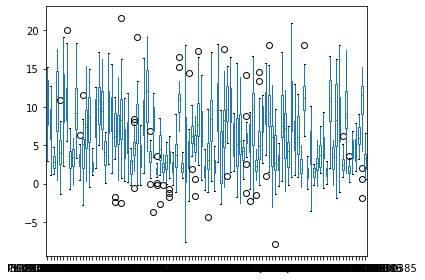

In [14]:
# Plot and show scatter
data_plotting.plot(kind="box")
plt.tight_layout()
plt.show()



## Create Boxplots of Week-12 Treated data

In [15]:
data_plotting2 = data_sub1_week12_treated.drop(["Subject","Treatment","Site","Time"], axis=1)
data_plotting2 = data_plotting2.set_index("SampleID")
data_plotting


,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,CST3-OID01225,...,ANGPTL3-OID01306,LYVE1-OID01307,BMP-6-OID00379,ANG-1-OID00380,ADM-OID00381,CD40-L-OID00382,SLAMF7-OID00383,PGF-OID00384,ADAM-TS13-OID00385,BOC-OID00386
SampleID,,,,,,,,,,,,,,,,,,,,,
A16,11.431302,10.207661,3.311984,10.313994,3.526815,13.334769,10.661415,3.454648,4.788196,9.268302,...,16.219601,6.585470,2.583167,7.864351,2.403252,6.054128,6.026412,5.794836,13.233841,6.611926
A22,14.413956,4.499181,2.157865,11.475391,5.275544,8.329090,9.415025,4.355936,1.821448,3.862319,...,8.347996,6.331512,1.934204,10.836894,1.788862,5.705194,5.664318,3.202821,9.450591,2.944122
A28,14.298536,9.245159,3.876550,17.613731,1.442955,19.111726,8.377921,6.110698,-0.142707,4.788843,...,8.216388,2.749104,1.856208,7.109449,0.617727,4.393221,7.281598,7.139218,10.923844,3.359619
A31,8.997277,6.213137,4.177450,12.263095,2.457417,14.995332,16.445440,3.376299,3.574273,13.678336,...,1.405525,7.363934,0.802100,15.782508,0.156779,2.405690,3.069570,4.613158,10.580098,3.735951
A43,13.239903,2.737570,1.469364,3.395995,5.755748,4.580889,16.362145,0.720351,4.323355,12.124630,...,8.478774,11.663084,1.747530,3.484689,1.407699,4.704192,2.730972,6.940682,11.586009,0.634908
A52,10.706560,10.242907,3.979089,12.678149,8.148608,12.584953,6.870237,4.102986,2.844699,9.305607,...,8.790792,11.329231,2.402368,2.789667,2.107521,3.132297,7.026995,5.649481,8.770101,0.915921
A55,13.903061,6.634164,1.831752,17.212303,4.184785,14.601944,11.389343,7.201252,0.622057,18.381362,...,2.005156,4.586931,2.891111,13.690826,1.701088,5.821557,4.776657,5.974116,4.234998,5.820168
A67,13.682953,9.201907,2.864919,0.423135,0.792712,11.840858,11.711461,5.310094,3.555242,12.822397,...,14.754664,8.870500,4.121152,7.621258,1.809465,4.317222,4.883482,7.505217,7.498595,3.450983
B2,7.573612,2.522189,2.655571,15.020350,5.672701,14.499941,5.679460,3.803006,3.406612,7.059989,...,16.306137,11.512802,3.872090,8.676630,1.800899,3.517253,6.224177,6.183493,12.385130,3.863414


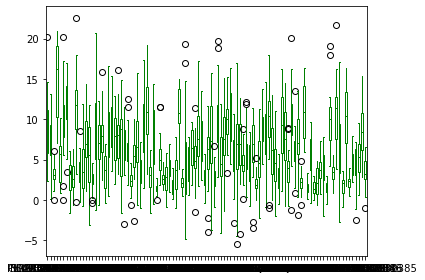

In [16]:
data_plotting2.plot(kind="box", color="green")
plt.tight_layout()
plt.show()



### Eyeballing the Baseline Treated Boxplots to the Week 12 Treated Boxplots show a potential decrease in NPX levels for these 100 proteins

# Random Forest Model

## The Random Forest Model is a quick and accurate classification model that's popular in ranking features of importance. We can create a model to see which proteins are potential indicators of a response

In [17]:
features = pd.read_csv("Resources/NPX_data1_merged.csv")


In [18]:
features = features.set_index('SampleID')
features


,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,CST3-OID01225,...,FABP9-OID01115,TMPRSS15-OID01116,LHB-OID01117,FOSB-OID01118,CALR-OID01119,PGF-OID01493,Subject,Treatment,Site,Time
SampleID,,,,,,,,,,,,,,,,,,,,,
A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,12.019284,...,5.698748,1.640175,1.187713,3.843168,1.278116,2.457126,ID1,Untreated,Site_D,Baseline
A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,12.086564,...,5.751120,1.433037,2.068403,2.972200,4.908331,3.756646,ID1,Untreated,Site_D,Week.6
A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,13.761894,...,9.776941,2.514728,0.530500,0.803449,5.720805,2.195161,ID1,Untreated,Site_D,Week.12
A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,10.029911,...,8.191348,4.953789,1.588413,1.929322,6.883288,2.552394,ID2,Untreated,Site_C,Baseline
A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,10.567973,...,5.697130,1.292394,1.370663,2.180779,13.823078,1.381204,ID2,Untreated,Site_C,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B75,13.024688,3.918886,3.163334,11.961131,1.396265,7.350203,19.334173,2.183027,4.348268,9.872193,...,7.463973,3.605572,2.263226,3.107379,11.549792,4.065760,ID51,Untreated,Site_A,Week.6
B76,12.651836,9.767998,3.262239,14.746187,4.040677,13.739613,8.324083,-0.940497,2.920415,7.521120,...,6.148645,4.861764,1.012678,2.734845,7.009428,3.234534,ID51,Untreated,Site_A,Week.12
B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,7.545368,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Treated,Site_B,Baseline


In [19]:
features = features.rename(columns={"Treatment":"Response"})
features.loc[features["Response"]=="Untreated","Response"] = "Nonresponder"
features.loc[features["Response"]=="Treated","Response"] = "Responder"
features

,CHL1-OID01216,NRP1-OID01217,PLXNB2-OID01218,FCGR3B-OID01219,LILRB5-OID01220,APOM-OID01221,SOD1-OID01222,CA1-OID01223,TIMP1-OID01224,CST3-OID01225,...,FABP9-OID01115,TMPRSS15-OID01116,LHB-OID01117,FOSB-OID01118,CALR-OID01119,PGF-OID01493,Subject,Response,Site,Time
SampleID,,,,,,,,,,,,,,,,,,,,,
A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,12.019284,...,5.698748,1.640175,1.187713,3.843168,1.278116,2.457126,ID1,Nonresponder,Site_D,Baseline
A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,12.086564,...,5.751120,1.433037,2.068403,2.972200,4.908331,3.756646,ID1,Nonresponder,Site_D,Week.6
A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,13.761894,...,9.776941,2.514728,0.530500,0.803449,5.720805,2.195161,ID1,Nonresponder,Site_D,Week.12
A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,10.029911,...,8.191348,4.953789,1.588413,1.929322,6.883288,2.552394,ID2,Nonresponder,Site_C,Baseline
A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,10.567973,...,5.697130,1.292394,1.370663,2.180779,13.823078,1.381204,ID2,Nonresponder,Site_C,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B75,13.024688,3.918886,3.163334,11.961131,1.396265,7.350203,19.334173,2.183027,4.348268,9.872193,...,7.463973,3.605572,2.263226,3.107379,11.549792,4.065760,ID51,Nonresponder,Site_A,Week.6
B76,12.651836,9.767998,3.262239,14.746187,4.040677,13.739613,8.324083,-0.940497,2.920415,7.521120,...,6.148645,4.861764,1.012678,2.734845,7.009428,3.234534,ID51,Nonresponder,Site_A,Week.12
B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,7.545368,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Responder,Site_B,Baseline


In [20]:
features = pd.get_dummies(features)


In [21]:
labels = np.array(features["Response_Responder"])
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1], dtype=uint8)

In [22]:
features.iloc[:,1100:].head(5)


,LHB-OID01117,FOSB-OID01118,CALR-OID01119,PGF-OID01493,Subject_ID1,Subject_ID10,Subject_ID11,Subject_ID12,Subject_ID13,Subject_ID14,...,Response_Nonresponder,Response_Responder,Site_Site_A,Site_Site_B,Site_Site_C,Site_Site_D,Site_Site_E,Time_Baseline,Time_Week.12,Time_Week.6
SampleID,,,,,,,,,,,,,,,,,,,,,
A1,1.187713,3.843168,1.278116,2.457126,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
A2,2.068403,2.972200,4.908331,3.756646,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
A3,0.530500,0.803449,5.720805,2.195161,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
A4,1.588413,1.929322,6.883288,2.552394,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
A5,1.370663,2.180779,13.823078,1.381204,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [23]:
features = features.drop({"Response_Nonresponder","Response_Responder"},axis=1)
feature_list=list(features.columns)


In [24]:
features = np.array(features)


In [25]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=.2, random_state=78, stratify=labels)


In [26]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (124, 1164)
Training Labels Shape: (124,)
Testing Features Shape: (32, 1164)
Testing Labels Shape: (32,)


In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000,random_state = 78)
# Train the model on training data
rf.fit(train_features, train_labels)


RandomForestClassifier(n_estimators=1000, random_state=78)

In [28]:
from sklearn.metrics import f1_score
pred_train = rf.predict(train_features)
print('Training Set Evaluation F1-Score=>',f1_score(train_labels,pred_train))
pred_test = rf.predict(test_features)
print('Testing Set Evaluation F1-Score=>',f1_score(test_labels,pred_test))


Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.923076923076923


In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print(f'Predictions: {predictions}')
print(f'Test labels: {test_labels}')
# Calculate the absolute errors
errors = abs(predictions - test_labels)
print(f'Errors: {errors}')
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Predictions: [0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1]
Test labels: [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1]
Errors: [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 255   0   0   0   0   0   0]
Mean Absolute Error: 15.94 degrees.


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(test_labels, predictions)


0.9375

In [58]:
cm = confusion_matrix(test_labels, predictions)
print(cm)

[[18  0]
 [ 2 12]]


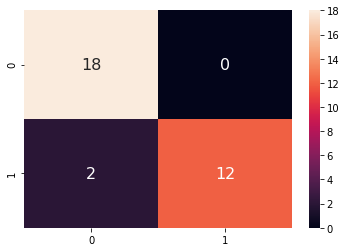

In [63]:
import seaborn
seaborn.heatmap(cm,annot=True,annot_kws={"size":16})
plt.show()

In [32]:
target_names = ["Nonresponder","Responder"]
print(classification_report(test_labels, predictions,target_names=target_names))


precision    recall  f1-score   support

Nonresponder       0.90      1.00      0.95        18
   Responder       1.00      0.86      0.92        14

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



In [33]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[455]
#Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree7.png')


In [34]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

for x in range(0,30):
    print(feature_importances[x])


('FUT8-OID05195', 0.0101)
('PLC-OID00582', 0.0079)
('AOC1-OID05212', 0.0079)
('U-PAR-OID00620', 0.0078)
('OPG-OID00571', 0.0074)
('BID-OID01051', 0.0068)
('TNFRSF10A-OID01309', 0.0066)
('DNAJB1-OID01342', 0.0066)
('CLEC6A-OID01017', 0.006)
('IL-22 RA1-OID00516', 0.0059)
('SERPINA7-OID01232', 0.0058)
('ITGB5-OID00696', 0.0058)
('CA2-OID01477', 0.0056)
('CXCL11-OID00486', 0.0056)
('ICOSLG-OID00731', 0.0056)
('LEP-OID00463', 0.0055)
('IFN-gamma-R1-OID00670', 0.0054)
('ICAM-2-OID00646', 0.0053)
('TRAIL-OID00488', 0.0053)
('TWEAK-OID00555', 0.0051)
('LAIR1-OID01488', 0.0048)
("5'-NT-OID00708", 0.0048)
('XCL1-OID00433', 0.0046)
('CLEC5A-OID01135', 0.0046)
('JAM-A-OID00625', 0.0045)
('NINJ1-OID01372', 0.0045)
('SOST-OID01174', 0.0044)
('DPP4-OID01266', 0.0043)
('SEMA4C-OID01381', 0.0042)
('B4GALT1-OID01421', 0.0042)


In [35]:
#Save model to a binary file
import pickle
filename = "RandomForest_Model"
pickle.dump(rf, open(filename,'wb'))

 ## Test 1
### Number of Estimators: 2000
### Random State: 42
### Train/Test ratio: .8/.2

### F1-Score: .846
### Mean Absolute Error: 31.88 degrees
### Top Importances: DNAJB1-OID01342, 0.0141
###                  FUT8-OID05195, 0.0103
###                  IFN-gamma-R1-OID00670, 0.0102

## Test 2
### Number of Estimators: 2000
### Random State: 88
### Train/Test ratio: .8/.2

### F1-Score: .6363
### Mean Absolute Error: 63.75 degrees
### Top Importances: ITGB5-OID01342, 0.0117
###                  FUT8-OID00696, 0.0109
###                  U-PAR-OID00620, 0.0086

## Test 3
### Number of Estimators: 1000
### Random State: 78
### Train/Test ratio: .8/.2

### F1-Score: .956
### Mean Absolute Error: 7.97 degrees
### Top Importances: 'U-PAR-OID00620', 0.0105
###                  'CLEC6A-OID01017', 0.0078
###                  'DNAJB1-OID01342', 0.0073

## Test 4
### Number of Estimators: 1000
### Random State: 78
### Train/Test ratio: .8/.2 with Stratified Labels

### F1-Score: .923
### Mean Absolute Error: 15.94 degrees
### Top Importances: ('FUT8-OID05195', 0.0101)
###                  ('PLC-OID00582', 0.0079)
###                  ('AOC1-OID05212', 0.0079)

## We will use the Test 4 model to predit the response variable of the second dataset



# Testing Entire 2nd Dataset with Random Forest Classifier Model

In [36]:
features2 = pd.read_csv("Resources/NPX_data2_merged.csv")


In [37]:
features2 = features2.set_index('SampleID')
features2


,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,CST3_OID01225,...,FABP9_OID01115,TMPRSS15_OID01116,LHB_OID01117,FOSB_OID01118,CALR_OID01119,PGF_OID01493,Subject,Response,Site,Time
SampleID,,,,,,,,,,,,,,,,,,,,,
C1,5.700700,7.215954,2.966872,17.131001,2.414491,8.120078,13.587876,-0.534212,3.098578,5.431859,...,10.657196,4.017532,0.119105,3.469627,7.603830,1.328398,ID53,Nonresponder,Site_A,Baseline
C2,12.060992,7.014983,4.486920,16.061693,3.076927,15.680329,6.388344,-0.380580,3.326730,7.710621,...,14.178280,3.572108,0.213940,4.136960,5.415676,4.645882,ID53,Nonresponder,Site_A,Week.6
C3,3.870134,9.280425,3.243896,13.782195,2.367451,9.730258,7.316046,4.825048,2.255583,6.886555,...,14.544065,4.667122,2.313072,2.375700,9.092892,3.306744,ID53,Nonresponder,Site_A,Week.12
C4,8.415287,8.237731,1.634328,15.977476,2.304900,14.670817,13.642506,-1.693990,0.432016,8.601751,...,9.474034,5.299713,0.099867,2.552450,6.968322,0.594037,ID54,Responder,Site_A,Baseline
C5,12.422661,8.990257,3.860460,21.986337,2.864509,9.004636,14.434923,-0.584122,1.488949,3.013329,...,11.170872,3.563667,0.495528,1.982690,8.048509,0.199905,ID54,Responder,Site_A,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D75,7.670679,5.574311,1.533404,14.643072,2.946669,1.089644,8.044184,7.459300,4.256623,1.369767,...,10.091431,4.037366,0.477449,4.341510,5.170047,3.156544,ID103,Responder,Site_B,Week.6
D76,0.455496,8.794280,1.987297,20.919788,3.638106,10.439191,6.187067,8.880071,2.996724,2.572333,...,12.042394,5.713056,0.830793,4.389175,3.312788,3.506562,ID103,Responder,Site_B,Week.12
D77,14.086554,8.210769,1.913927,7.194823,0.102605,8.272866,12.548980,3.074294,3.877221,10.560612,...,9.430830,1.786090,0.883301,7.037593,9.471667,5.521970,ID104,Responder,Site_C,Baseline


In [38]:
features2 = pd.get_dummies(features2)


In [39]:
features2


,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,CST3_OID01225,...,Response_Nonresponder,Response_Responder,Site_Site_A,Site_Site_B,Site_Site_C,Site_Site_D,Site_Site_E,Time_Baseline,Time_Week.12,Time_Week.6
SampleID,,,,,,,,,,,,,,,,,,,,,
C1,5.700700,7.215954,2.966872,17.131001,2.414491,8.120078,13.587876,-0.534212,3.098578,5.431859,...,1,0,1,0,0,0,0,1,0,0
C2,12.060992,7.014983,4.486920,16.061693,3.076927,15.680329,6.388344,-0.380580,3.326730,7.710621,...,1,0,1,0,0,0,0,0,0,1
C3,3.870134,9.280425,3.243896,13.782195,2.367451,9.730258,7.316046,4.825048,2.255583,6.886555,...,1,0,1,0,0,0,0,0,1,0
C4,8.415287,8.237731,1.634328,15.977476,2.304900,14.670817,13.642506,-1.693990,0.432016,8.601751,...,0,1,1,0,0,0,0,1,0,0
C5,12.422661,8.990257,3.860460,21.986337,2.864509,9.004636,14.434923,-0.584122,1.488949,3.013329,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D75,7.670679,5.574311,1.533404,14.643072,2.946669,1.089644,8.044184,7.459300,4.256623,1.369767,...,0,1,0,1,0,0,0,0,0,1
D76,0.455496,8.794280,1.987297,20.919788,3.638106,10.439191,6.187067,8.880071,2.996724,2.572333,...,0,1,0,1,0,0,0,0,1,0
D77,14.086554,8.210769,1.913927,7.194823,0.102605,8.272866,12.548980,3.074294,3.877221,10.560612,...,0,1,0,0,1,0,0,1,0,0


In [40]:
labels2 = np.array(features2["Response_Responder"])
labels2


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=uint8)

In [41]:
features2 = features2.drop({"Response_Nonresponder","Response_Responder"},axis=1)
feature2_list=list(features2.columns)


In [42]:
features2 = np.array(features2)


In [43]:
# Use the forest's predict method on the test data
predictions2 = rf.predict(features2)
print(f'Predictions: {predictions2}')
print(f'Test labels: {labels2}')
# Calculate the absolute errors
errors2 = abs(predictions2 - labels2)
print(f'Errors: {errors2}')
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2), 'degrees.')


Predictions: [0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 0 0 1 1]
Test labels: [0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Errors: [  0   0   0 255 255   0 255   0   0   0   0   0 255 255   0 255 255 255
   0   0   1 255 255   0 255   0   0   1   0   0   0   0   0   0   1   0
   0   0   0   0   0   1   0   0   1   0 255   0 255   0 255   1   0   0
   0   0   0   0   0   0 255 255 255   0   0   0   0   0   0 255 255 255
 255 255   0   0   0   1   0   0 255  

In [44]:
accuracy_score(labels2, predictions2)


0.7051282051282052

In [60]:
cm2 = confusion_matrix(labels2, predictions2)
print(cm2)

[[75  9]
 [37 35]]


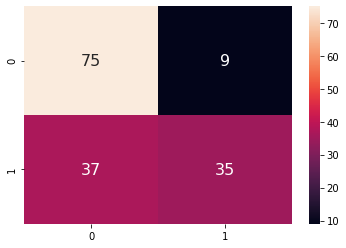

In [62]:
import seaborn
seaborn.heatmap(cm2,annot=True, annot_kws={"size":16})
plt.show()

In [46]:
target_names = ["Nonresponder","Responder"]
print(classification_report(labels2, predictions2,target_names=target_names))


precision    recall  f1-score   support

Nonresponder       0.67      0.89      0.77        84
   Responder       0.80      0.49      0.60        72

    accuracy                           0.71       156
   macro avg       0.73      0.69      0.68       156
weighted avg       0.73      0.71      0.69       156



## Accuracy for model with 2nd data set is 71%
